<a href="https://colab.research.google.com/github/mifm/examples/blob/master/pywake_load_surrogates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from py_wake.examples.data.iea34_130rwt import IEA34_130_1WT_Surrogate
from py_wake.examples.data.lillgrund import LillgrundSite
from py_wake.deficit_models.gaussian import NiayifarGaussian
from py_wake.turbulence_models.stf import STF2017TurbulenceModel
from py_wake.deflection_models.jimenez import JimenezWakeDeflection
from py_wake.superposition_models import MaxSum

In [3]:
wt = IEA34_130_1WT_Surrogate()
site = LillgrundSite()
wfm = NiayifarGaussian(site, wt, deflectionModel=JimenezWakeDeflection(),turbulenceModel=STF2017TurbulenceModel(addedTurbulenceSuperpositionModel=MaxSum()))
sim_res = wfm([0, 100], [0, 0])
sim_res

<xarray.SimulationResult>
Dimensions:           (wd: 360, ws: 23, wt: 2)
Coordinates:
  * wt                (wt) int64 0 1
  * wd                (wd) int64 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
  * ws                (ws) int64 3 4 5 6 7 8 9 10 11 ... 18 19 20 21 22 23 24 25
    x                 (wt) float64 0.0 100.0
    y                 (wt) float64 0.0 0.0
    h                 (wt) float64 110.0 110.0
    type              (wt) int64 0 0
Data variables: (12/15)
    WS_eff            (wt, wd, ws) float64 3.0 4.0 4.945 ... 23.0 24.0 25.0
    TI_eff            (wt, wd, ws) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    Power             (wt, wd, ws) float64 0.0 0.0 4.657e+05 ... 3.4e+06 0.0
    CT                (wt, wd, ws) float64 0.03881 0.03881 ... 0.04288 0.03881
    WS                (ws) int64 3 4 5 6 7 8 9 10 11 ... 18 19 20 21 22 23 24 25
    WD                (wd) int64 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
    ...                ...
    Weibull_A         (wd) float64 4.5 4.5 4.5 4.5 4.5 ... 4.5 4.5 4.5 4.5 4.5
    Weibull_k         (wd) float64 1.69 1.69 1.69 1.69 ... 1.69 1.69 1.69 1.69
    Sector_frequency  (wd) float64 0.001267 0.001267 ... 0.001267 0.001267
    P                 (wd, ws) float64 0.000216 0.0001927 ... 2.183e-11
    yaw               (wt, wd, ws) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    tilt              (wt, wd, ws) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    wd_bin_size:  1

In [9]:
DEL_silk = sim_res.loads('OneWT')['DEL']

In [28]:
load_channel = 0

Text(0.5, 1.0, 'del_blade_flap')

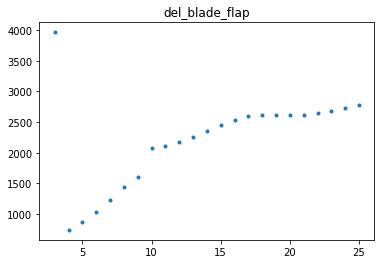

In [29]:
plt.plot(sim_res.ws, np.squeeze(DEL_silk[load_channel, 0, sim_res.wd==270, :]), '.')
plt.title(str(DEL_silk.sensor[load_channel].values))